<a href="https://colab.research.google.com/github/vyankateshgithubber/Audio-Source-Count-Estimation/blob/working/CNNmodel2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
!pip install wavefile
import wavefile

  Created wheel for wavefile: filename=wavefile-1.5-py3-none-any.whl size=11588 sha256=0d84a4498ff3a45371d8ea88ec64d53e6ecc99a08ef1adce86f6a4d6f32325b5
  Stored in directory: /root/.cache/pip/wheels/da/13/0f/4cef0631e2b18df2da6ebad4065f076b1807af1aecd1dce1a0
Successfully built wavefile


In [ ]:
def stft(y,sr):
  S = np.abs(librosa.stft(y,n_fft=512,hop_length=256))
  return S

path = '/content/drive/MyDrive/MajorProject/AudioDataset/'
k1 = 0.4
k2 = 0.4
audiofilepath = path+'2_'+str(round(k1,3))+'_'+str(round(k2,3))+'.wav'
sr,signal = wavefile.load(audiofilepath)
signal=np.reshape(signal,signal.size)
stft(signal,sr)
sr

16000

In [ ]:
def features_labels():
  X = []
  y = []
  path = '/content/drive/MyDrive/MajorProject/AudioDataset/'

  for k1 in np.arange(0.02,1.02,0.02):
    for k2 in np.arange(0.02,1.02,0.02):
      audiofilepath = path+'2_'+str(round(k1,3))+'_'+str(round(k2,3))+'.wav'
      sr,signal = wavefile.load(audiofilepath)
      signal=np.reshape(signal,signal.size)
      X.append(stft(signal,sr))
      y.append(1)

  for k1 in np.arange(0.001,1.001,0.001):
    audiofilepath = path+'1_'+str(round(k1,3))+'_'+str(round(0,3))+'.wav'
    sr,signal = wavefile.load(audiofilepath)
    signal=np.reshape(signal,signal.size)
    X.append(stft(signal,sr))
    y.append(0)


  for k1 in np.arange(0.001,1.001,0.001):
    audiofilepath = path +'1_'+str(round(0,3))+'_'+str(round(k1,3))+'.wav'
    sr,signal = wavefile.load(audiofilepath)
    signal=np.reshape(signal,signal.size)
    X.append(stft(signal,sr))
    y.append(0)

  X = np.array(X)
  y = np.array(y)
  size = X.shape
  X = X.reshape((size[0],size[1],size[2],1))
  y = y.reshape((size[0],1))
  return X,y


In [ ]:
X,y = features_labels()
X.shape,y.shape

NameError: ignored

In [ ]:
y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True)
print(X_train.shape,y_train.shape)

(3600, 257, 333, 1) (3600, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
from tensorflow.keras import models

def model1():
  input_shape = X_train.shape[1:]
  
  model = models.Sequential([
      layers.Input(shape=input_shape),
      preprocessing.Resizing(32, 32), 
      layers.Conv2D(32, 3, activation='relu'),
      layers.Conv2D(64, 3, activation='relu'),
      layers.MaxPooling2D(),
      layers.Dropout(0.25),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(1),
    ])
  
  model.compile(optimizer="Adam", loss="mse", metrics=["accuracy"])
  
  history = model.fit(X_train, y_train,validation_split=0.2, epochs=10)
  
  test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
  print("Test Loss ", test_loss)
  print("Test Accuracy ", test_acc)
  
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  return model

Epoch 1/10
90/90 [==============================] - 2s 18ms/step - loss: 0.1857 - accuracy: 0.7701 - val_loss: 0.0787 - val_accuracy: 0.9417
Epoch 2/10
90/90 [==============================] - 1s 14ms/step - loss: 0.0732 - accuracy: 0.9260 - val_loss: 0.0302 - val_accuracy: 0.9708
Epoch 3/10
90/90 [==============================] - 1s 14ms/step - loss: 0.0447 - accuracy: 0.9698 - val_loss: 0.0159 - val_accuracy: 0.9861
Epoch 4/10
90/90 [==============================] - 1s 13ms/step - loss: 0.0334 - accuracy: 0.9819 - val_loss: 0.0095 - val_accuracy: 0.9958
Epoch 5/10
90/90 [==============================] - 1s 14ms/step - loss: 0.0283 - accuracy: 0.9865 - val_loss: 0.0066 - val_accuracy: 0.9903
Epoch 6/10
90/90 [==============================] - 1s 14ms/step - loss: 0.0259 - accuracy: 0.9889 - val_loss: 0.0038 - val_accuracy: 0.9972
Epoch 7/10
90/90 [==============================] - 1s 15ms/step - loss: 0.0241 - accuracy: 0.9948 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 8/10
90

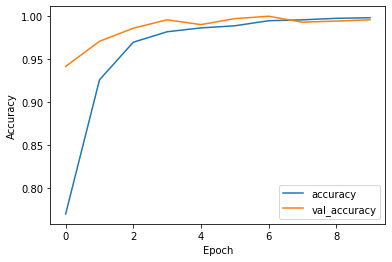

In [ ]:
model = model1()

In [ ]:
model.save('/content/drive/MyDrive/MajorProject/Models/my_model.h5')

In [ ]:
import tensorflow as tf
new_model = tf.keras.models.load_model('/content/drive/MyDrive/MajorProject/Models/my_model.h5')

# Show the model architecture
new_model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing_2 (Resizing)        (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [ ]:
y_test_predict = new_model.predict(X_test)
y_test_predict = np.round(y_test_predict).astype('int32')

NameError: ignored

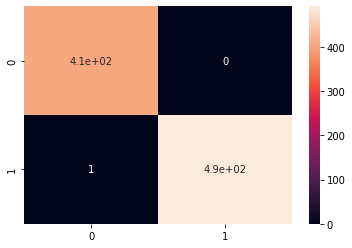

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test , y_test_predict)
sns.heatmap(cf_matrix, annot=True)

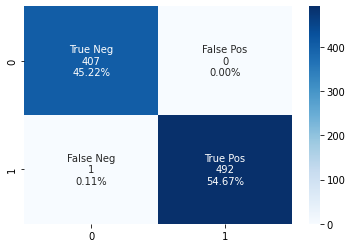

In [ ]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


In [ ]:
def prediction(test_filepath):
  sr,signal = wavefile.load(test_filepath)
  signal=np.reshape(signal,signal.size)
  feature = stft(signal,sr)
  size = feature.shape
  feature = feature.reshape(1,size[0],size[1])
  output = new_model.predict(feature)
  output = np.round(output).astype('int32')
  return output


In [ ]:
path = '/content/drive/MyDrive/MajorProject/AudioDataset/'
k1 = 0.4
k2 = 0.4
audiofilepath = path+'2_'+str(round(k1,3))+'_'+str(round(k2,3))+'.wav'
#test_filepath = '/content/drive/MyDrive/MajorProject/s4_male.wav'
output = prediction(test_filepath)

In [ ]:
output

array([[0]], dtype=int32)